In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Load Model

In [3]:
model = tf.keras.models.load_model("My_new_plant_training_model.keras")

c:\Users\Sachin Gola\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    12,289,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,117,526 (130.15 MB)

 Trainable params: 17,058,762 (65.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,058,764 (65.07 MB)

Visualizing Single Image of Test Set

Text(0.5, 1.0, 'Test Image')

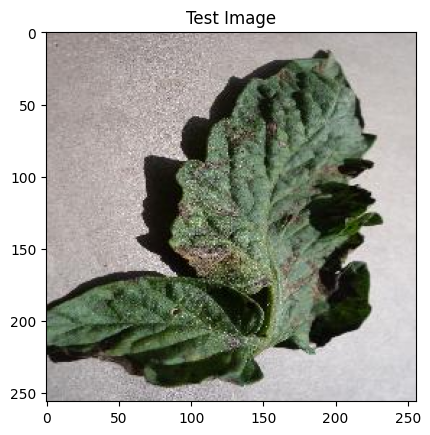

In [29]:
import cv2
image_path=r'C:\Users\Sachin Gola\OneDrive\Desktop\Major Project\MajorProject\Plant_Disease_Dataset\Plant_Disease_Dataset\test\TomatoEarlyBlight5.JPG'
# Reading Image
img=cv2.imread(image_path)

# To get original-coloured RGB image intstead of an BGR image.
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


plt.imshow(img)
plt.title("Test Image")

Testing Model


Performing pre-processing to convert the image in model-friendly format

In [30]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)

input_arr=np.array([input_arr]) # Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [31]:
prediction=model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step


(array([[2.17012186e-09, 1.70800845e-07, 1.86267339e-08, 4.64595814e-07,
         4.44999015e-09, 4.08059764e-09, 5.65522162e-09, 2.75198531e-09,
         6.38951725e-10, 3.04841763e-10, 4.55063598e-10, 7.12499393e-09,
         1.96648625e-06, 5.26573984e-09, 1.98749385e-11, 5.02468733e-10,
         1.17789497e-07, 1.13363505e-07, 4.32654410e-08, 1.37339768e-07,
         7.46257278e-09, 5.56807720e-07, 5.35195213e-08, 1.93924141e-10,
         1.57869628e-09, 1.19185106e-09, 7.21355136e-08, 2.63907146e-10,
         2.80301626e-09, 9.94569302e-01, 1.67029351e-03, 2.14949778e-05,
         4.11512556e-05, 4.47543061e-06, 1.63782926e-04, 1.89900118e-09,
         2.07626663e-08, 3.52565036e-03]], dtype=float32),
 (1, 38))

In [32]:
result_index=np.argmax(prediction)
print(result_index)

29


In [33]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Sachin Gola\OneDrive\Desktop\Major Project\MajorProject\Plant_Disease_Dataset\Plant_Disease_Dataset\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [34]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

To get predicted class name

In [35]:
model_prediction=class_name[result_index]

In [36]:
model_prediction

'Tomato___Early_blight'

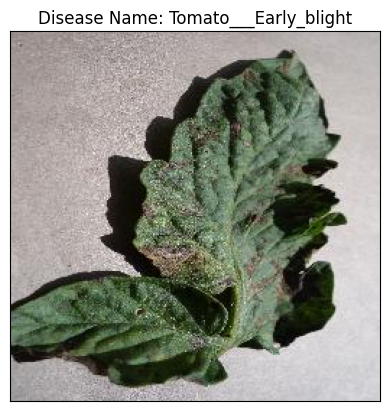

In [38]:

plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.imshow(img)